In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('data/Absenteeism_at_work.csv', sep=";")

In [2]:
# print dimensionality of the data, number of missing values and describe the data
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:35} | \
          type: {str(data[col].dtype):10} | \
          missing values: {data[col].isna().sum():3d}")

Data dimension: (740, 21)
Column: ID                                  |           type: int64      |           missing values:   0
Column: Reason for absence                  |           type: int64      |           missing values:   0
Column: Month of absence                    |           type: int64      |           missing values:   0
Column: Day of the week                     |           type: int64      |           missing values:   0
Column: Seasons                             |           type: int64      |           missing values:   0
Column: Transportation expense              |           type: int64      |           missing values:   0
Column: Distance from Residence to Work     |           type: int64      |           missing values:   0
Column: Service time                        |           type: int64      |           missing values:   0
Column: Age                                 |           type: int64      |           missing values:   0
Column: Work load Average/day

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [4]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August", 
    9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}
dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_econding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"]\
    .apply(lambda x: month_encoding[x]) 
preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"]\
    .apply(lambda x: dow_encoding[x]) 
preprocessed_data["Seasons"] = preprocessed_data["Seasons"]\
    .apply(lambda x: season_encoding[x]) 
preprocessed_data["Education"] = preprocessed_data["Education"]\
    .apply(lambda x: education_econding[x]) 
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"]\
    .apply(lambda x: yes_no_encoding[x]) 

In [5]:
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


### Exercise 2.01: Identifying disease reasons for absence

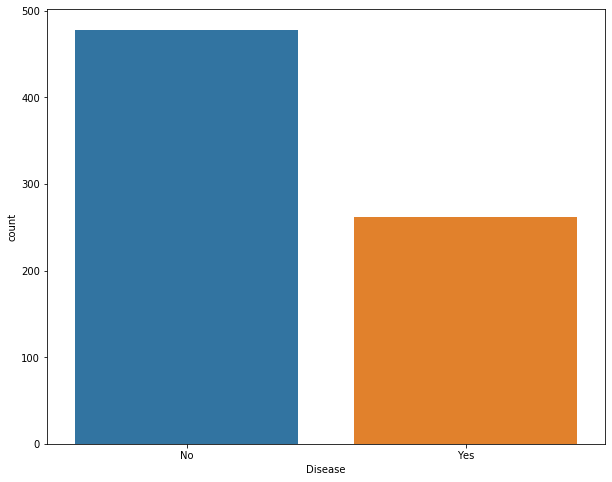

In [6]:
# define function, which checks if the provided integer value is contained in the ICD
def in_icd(val):
    return "Yes" if val >= 1 and val <= 21 else "No"

# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

# plot value counts
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')
plt.savefig('figs/disease_plot.png', format='png')

In [7]:
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


# Initial analysis on the reason for absence

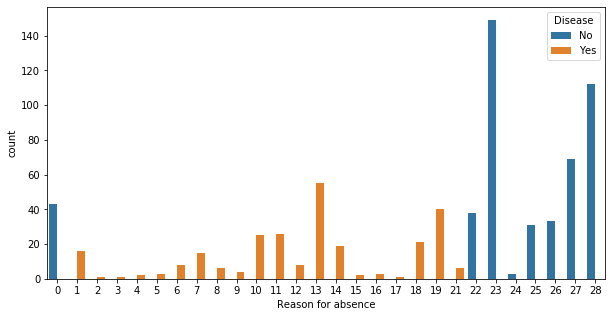

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=preprocessed_data, x="Reason for absence", hue="Disease")
plt.savefig('figs/absence_reasons_distribution.png', format='png')

#### Social drinkers and smokers analysis

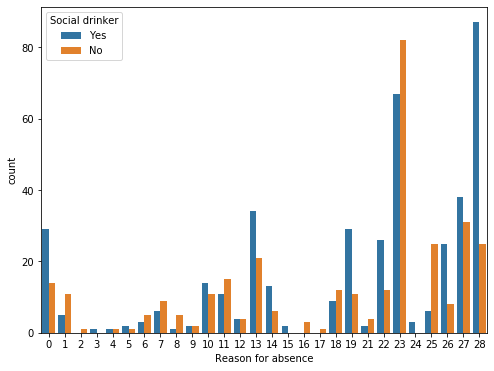

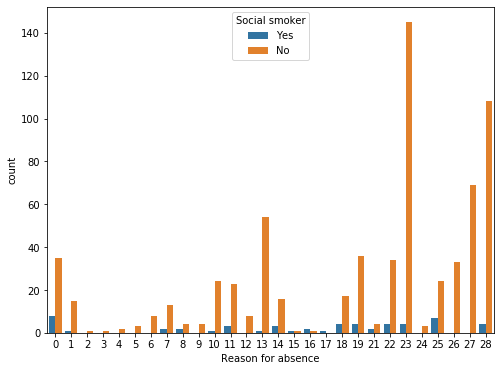

In [22]:
# plot reasons for absense agains being a social drinker/smoker
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", 
              hue="Social drinker", hue_order=["Yes", "No"])
plt.savefig('figs/absence_reasons_drinkers.png', format='png')

plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", 
              hue="Social smoker", hue_order=["Yes", "No"])
plt.savefig('figs/absence_reasons_smokers.png', format='png')

### Exercise 2.02: Identifying disease reasons with higher probability among drinkers and smokers

P(social drinker) = 0.568 | P(social smoker) = 0.073


<Figure size 432x288 with 0 Axes>

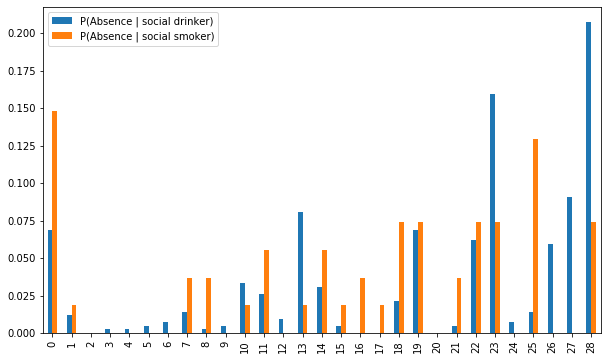

In [79]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"]\
    .value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"]\
    .value_counts(normalize=True)["Yes"]
print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

# create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

# compute probabilities of absence reasons and being a social drinker/smoker
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"]\
    [drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"]\
    [smoker_mask].value_counts()/total_entries

# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob/drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob/smoker_prob

# plot probabilities
plt.figure()
cond_prob.plot.bar(figsize=(10,6))
plt.savefig('figs/conditional_probabilities.png', format='png')

### Exercise 2.03: Identifying probability of being drinker/smoker, conditioned to absence reason

In [105]:
# compute reason for absence probabilities
absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize=True)


<Figure size 432x288 with 0 Axes>

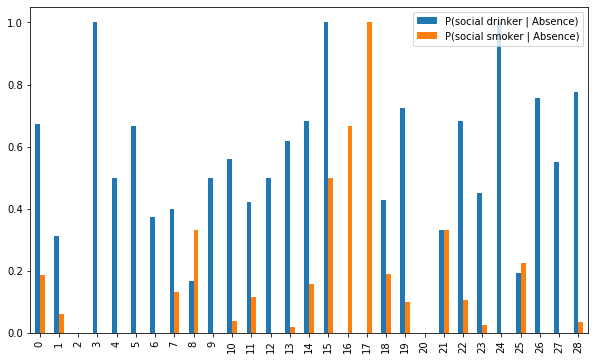

In [110]:
# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = \
    cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = \
    cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob

plt.figure()
cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
plt.savefig('figs/conditional_probabilities_drinker_smoker.png', format='png')

In [111]:
preprocessed_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disease
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,high_school,2,Yes,No,1,90,172,30,4,No
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,high_school,1,Yes,No,0,98,178,31,0,No
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,high_school,0,Yes,No,0,89,170,31,2,No
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,high_school,2,Yes,Yes,0,68,168,24,4,Yes
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,high_school,2,Yes,No,1,90,172,30,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,July,Tuesday,Spring,289,36,13,33,264.604,...,high_school,2,Yes,No,1,90,172,30,8,Yes
736,1,11,July,Tuesday,Spring,235,11,14,37,264.604,...,postgraduate,1,No,No,1,88,172,29,4,Yes
737,4,0,Unknown,Tuesday,Spring,118,14,13,40,271.219,...,high_school,1,Yes,No,8,98,170,34,0,No
738,8,0,Unknown,Wednesday,Summer,231,35,14,39,271.219,...,high_school,2,Yes,No,2,100,170,35,0,No


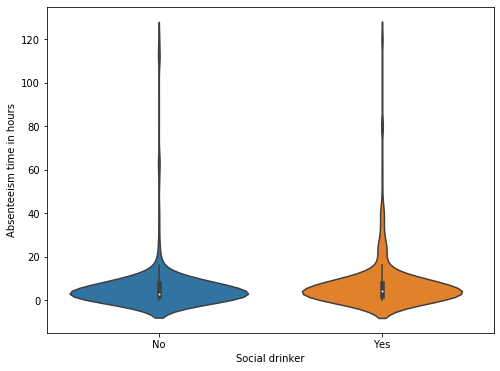

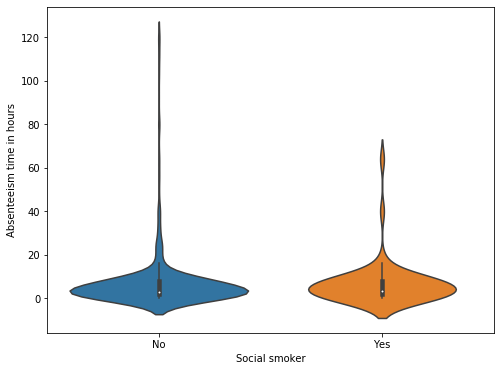

In [132]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", \
                   data=preprocessed_data, order=["No", "Yes"])
plt.savefig('figs/drinkers_hour_distribution.png', format='png')

plt.figure(figsize=(8,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", \
               data=preprocessed_data, order=["No", "Yes"])
plt.savefig('figs/smokers_hour_distribution.png', format='png')

In [146]:
from scipy.stats import ttest_ind

hours_col = "Absenteeism time in hours"

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}")


Statistic value: 1.7713833295243993, p-value: 0.07690961828294651
Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


In [159]:
# perform Kolmogorov-Smirnov test for comparing the distributions 
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison:  statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison:  statistics=0.104, pvalue=0.607


### Body Mass Index

In [170]:
# define function for computing the BMI category, based on BMI value
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    elif bmi >= 30:
        category = "obese"
    return category

# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"]\
    .apply(get_bmi_category)

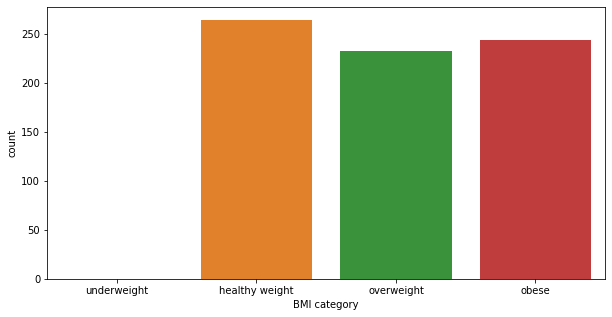

In [177]:
# plot number of entries for each category
plt.figure(figsize=(10, 5))
sns.countplot(data=preprocessed_data, x='BMI category', 
              order=["underweight", "healthy weight", "overweight", "obese"])
plt.savefig('figs/bmi_categories.png', format='png')

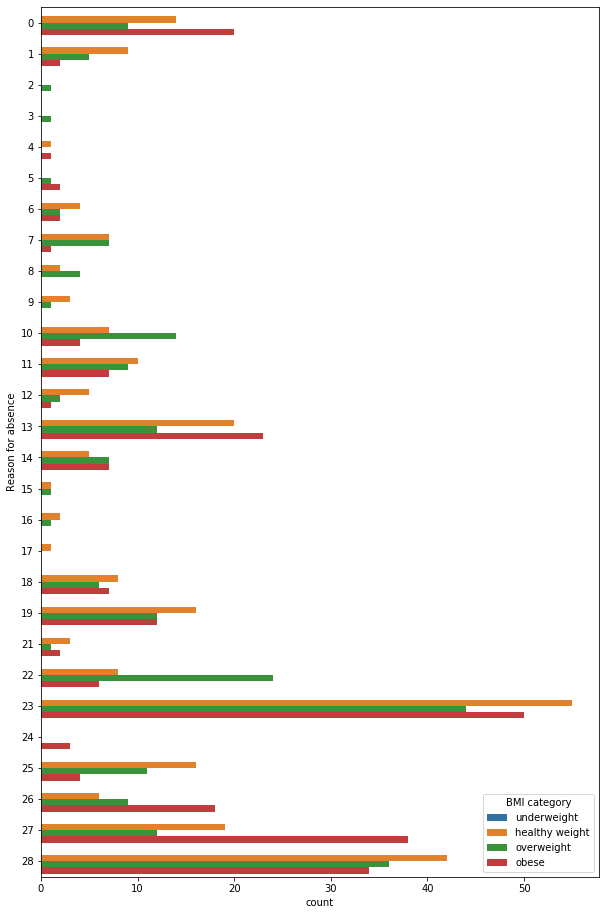

In [186]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence", hue="BMI category", 
              hue_order=["underweight", "healthy weight", "overweight", "obese"])
plt.savefig('figs/reasons_bmi.png', format='png')

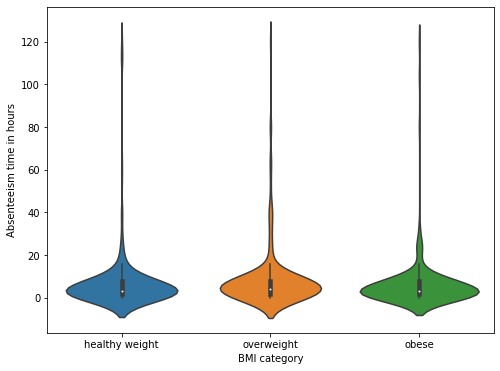

In [189]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", y="Absenteeism time in hours", \
                   data=preprocessed_data, order=["healthy weight", "overweight", "obese"])
plt.savefig('figs/bmi_hour_distribution.png', format='png')

### Age and education factors

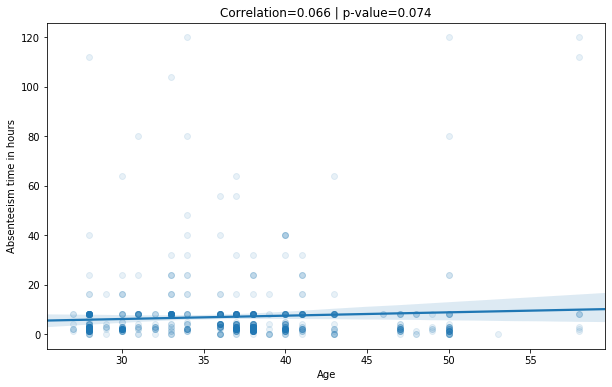

In [205]:
# correlation plot between age and absenteeism in hours
from scipy.stats import pearsonr

pearson_test = pearsonr(preprocessed_data["Age"], \
                        preprocessed_data["Absenteeism time in hours"])
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours", 
            data=preprocessed_data, scatter_kws={"alpha":0.1})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}");
plt.savefig('figs/correlation_age_hours.png', format='png')

### Exercise 2.04: Investigate Age impact on Reason for absence

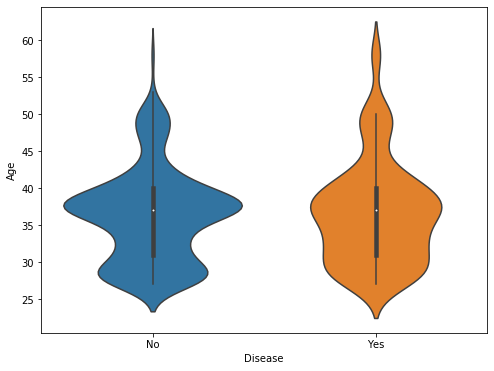

In [208]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)
plt.savefig('figs/exercise_204_age_disease.png', format='png')

In [219]:
# hypothesis test on equality of means
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]

test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

# Kolmogorov-Smirnov test for equality of distributions
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


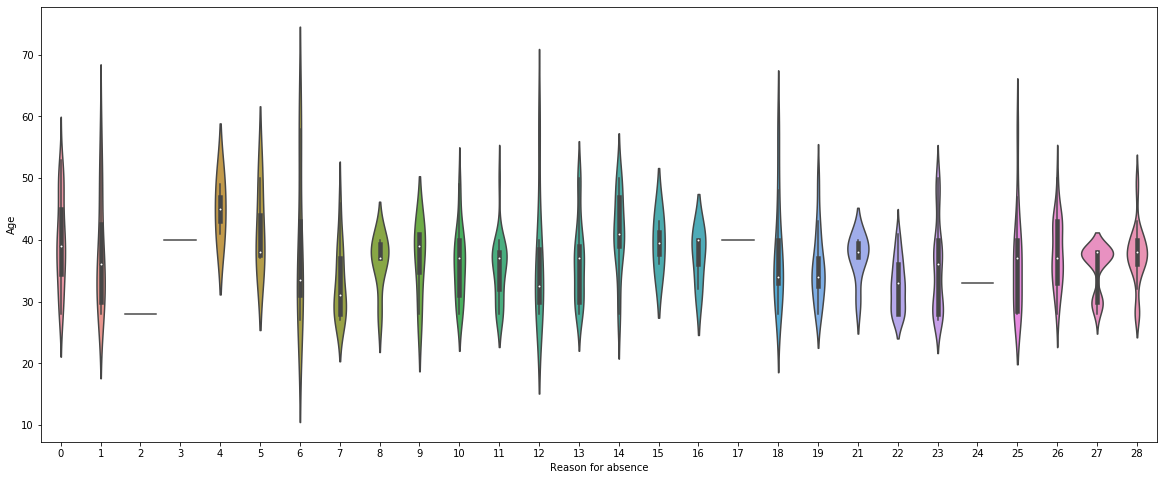

In [230]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", data=preprocessed_data)
plt.savefig('figs/exercise_204_age_reason.png', format='png')

## Exercise 2.05: Investigate Education impact on Reason for absence

In [294]:
# compute percentage of employees per education level
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
counts = preprocessed_data["Education"].value_counts()
percentages = preprocessed_data["Education"].value_counts(normalize=True)
for educ_type in education_types:
    print(f"Education type: {educ_type:12s} | Counts : {counts[educ_type]:6.0f} | Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school  | Counts :    611 | Percentage: 82.6
Education type: graduate     | Counts :     46 | Percentage:  6.2
Education type: postgraduate | Counts :     79 | Percentage: 10.7
Education type: master_phd   | Counts :      4 | Percentage:  0.5


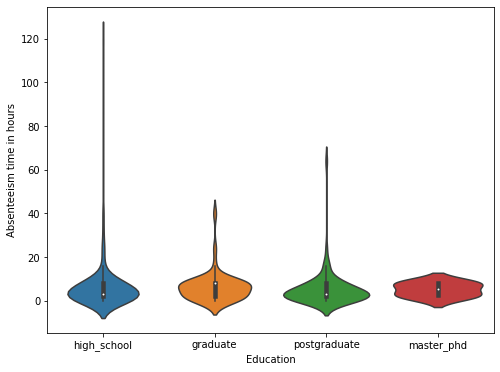

In [234]:
# distribution of absence hours, based on education level
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="Absenteeism time in hours",\
               data=preprocessed_data, order=["high_school", "graduate", \
                                              "postgraduate", "master_phd"])
plt.savefig('figs/exercise_205_education_hours.png', format='png')

In [248]:
# compute mean and standard deviation of absence hours
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
for educ_type in education_types:
    mask = preprocessed_data["Education"] == educ_type
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

Education type: high_school  | Mean : 7.190 | Stddev: 14.259
Education type: graduate     | Mean : 6.391 | Stddev: 6.754
Education type: postgraduate | Mean : 5.266 | Stddev: 7.963
Education type: master_phd   | Mean : 5.250 | Stddev: 3.202


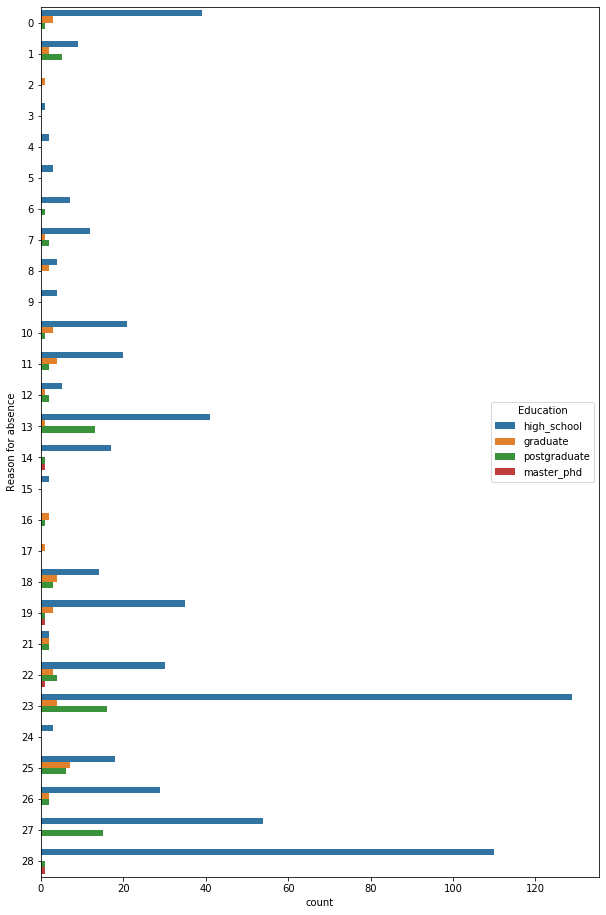

In [251]:
# plot reason for absence, based on education level
plt.figure(figsize=(10, 16))
sns.countplot(data=preprocessed_data, y="Reason for absence",\
              hue="Education", hue_order=["high_school", "graduate", \
                                          "postgraduate", "master_phd"])
plt.savefig('figs/exercise_205_education_reason.png', format='png')

In [327]:
# compute conditional probabilities
threshold = 40
total_entries = len(preprocessed_data)

high_school_mask = preprocessed_data["Education"] == "high_school"
extreme_mask = preprocessed_data["Absenteeism time in hours"] > threshold

prob_high_school = len(preprocessed_data[high_school_mask])/total_entries
prob_graduate = len(preprocessed_data[~high_school_mask])/total_entries

prob_extreme_high_school = len(preprocessed_data[high_school_mask &\
    extreme_mask])/total_entries
prob_extreme_graduate = len(preprocessed_data[~high_school_mask &\
    extreme_mask])/total_entries

cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate

print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}")

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


In [328]:
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


### Transportation costs and Distance to work factors

<Figure size 720x432 with 0 Axes>

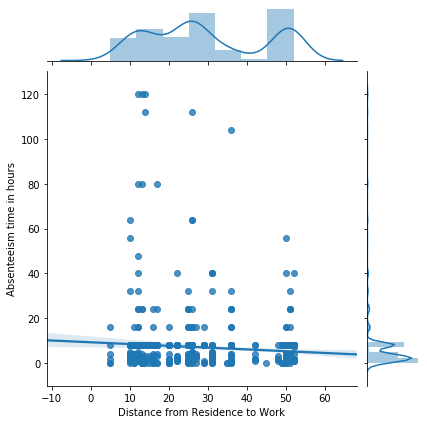

<Figure size 720x432 with 0 Axes>

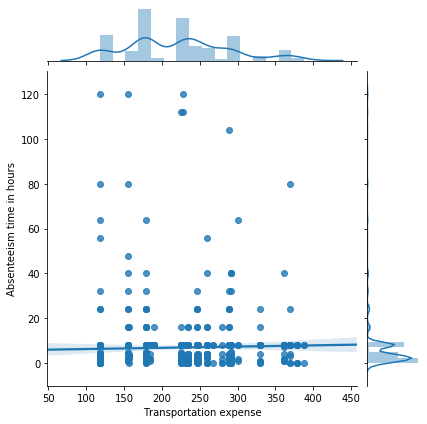

In [347]:
# plot transportation costs and distance to work agains hours
plt.figure(figsize=(10, 6))
sns.jointplot(x="Distance from Residence to Work", y="Absenteeism time in hours", 
              data=preprocessed_data, kind="reg")
plt.savefig('figs/distance_vs_hours.png', format='png')

plt.figure(figsize=(10, 6))
sns.jointplot(x="Transportation expense", y="Absenteeism time in hours", 
              data=preprocessed_data, kind="reg")
plt.savefig('figs/costs_vs_hours.png', format='png')

<Figure size 720x432 with 0 Axes>

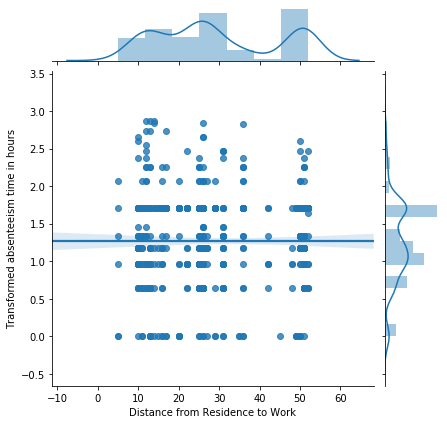

<Figure size 720x432 with 0 Axes>

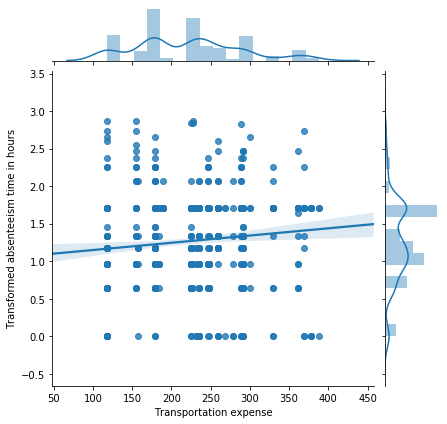

In [371]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work",\
                       "Transformed absenteeism time in hours")
plt.savefig('figs/distance_vs_hours_transformed.png', format='png')

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
                   "Transformed absenteeism time in hours")
plt.savefig('figs/costs_vs_hours_transformed.png', format='png')


<Figure size 720x432 with 0 Axes>

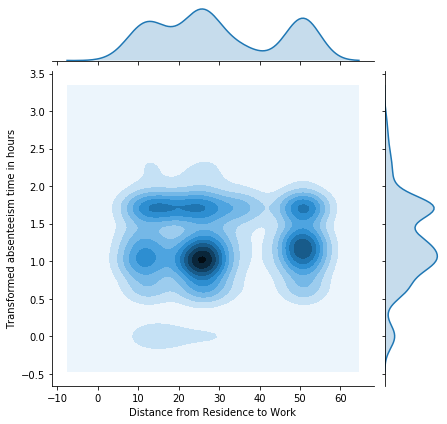

<Figure size 720x432 with 0 Axes>

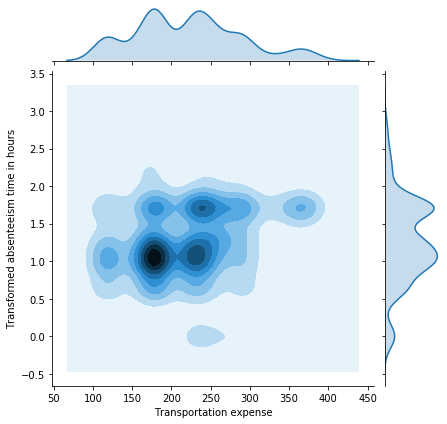

In [377]:
# produce KDE plots

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")
ax.set_axis_labels("Distance from Residence to Work",\
                       "Transformed absenteeism time in hours")
plt.savefig('figs/distance_vs_hours_transformed_kde.png', format='png')

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde")
ax.set_axis_labels("Transportation expense", \
                   "Transformed absenteeism time in hours")
plt.savefig('figs/costs_vs_hours_transformed_kde.png', format='png')


In [376]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)

print(f"Distances correlation: corr={distance_corr[0]:.3f}, pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison:  corr={expenses_corr[0]:.3f}, pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison:  corr=0.113, pvalue=0.002


### Temporal factors

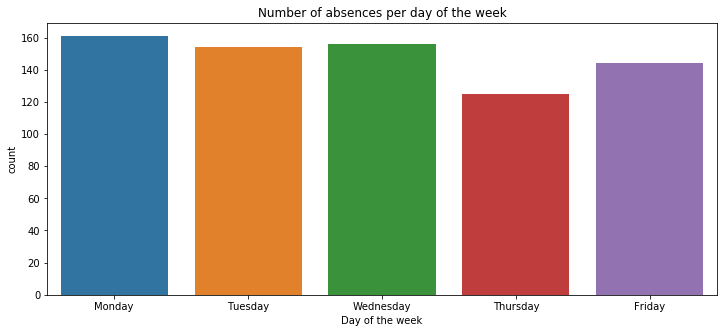

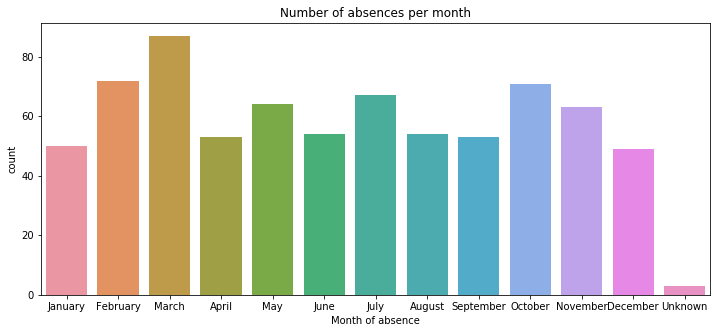

In [388]:
# count entries per day of the week and month
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Day of the week', 
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")
plt.savefig('figs/dow_counts.png', format='png')

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data, x='Month of absence', 
              order=["January", "February", "March", "April", "May", "June", "July", 
                     "August", "September", "October", "November", "December", "Unknown"])
ax.set_title("Number of absences per month")
plt.savefig('figs/month_counts.png', format='png')



### Exercise 2.06: Investigate absence hours, based on day of the week and month

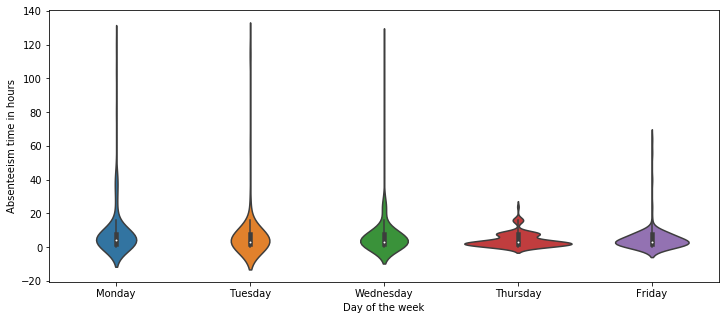

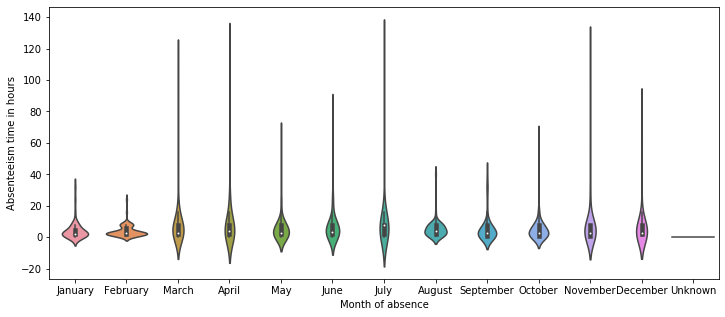

In [393]:
# analyze average distribution of absence hours
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", y="Absenteeism time in hours",\
               data=preprocessed_data, order=["Monday", "Tuesday", \
                                              "Wednesday", "Thursday", "Friday"])
plt.savefig('figs/exercise_206_dow_hours.png', format='png')

plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", y="Absenteeism time in hours",\
               data=preprocessed_data, order=["January", "February", \
                                              "March", "April", "May", "June", "July", 
                     "August", "September", "October", "November", "December", "Unknown"])
plt.savefig('figs/exercise_206_month_hours.png', format='png')

In [399]:
# compute mean and standard deviation of absence hours per day of the week
dows = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for dow in dows:
    mask = preprocessed_data["Day of the week"] == dow
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


In [404]:
# compute mean and standard deviation of absence hours per day of the month
months = ["January", "February", "March", "April", "May", "June", "July", 
    "August", "September", "October", "November", "December"]
for month in months:
    mask = preprocessed_data["Month of absence"] == month
    hours = preprocessed_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


In [411]:
# perform statistical test for avg duration difference
thursday_mask = preprocessed_data["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"

thursday_data = preprocessed_data["Absenteeism time in hours"]\
    [thursday_mask]
no_thursday_data = preprocessed_data["Absenteeism time in hours"]\
    [~thursday_mask]
july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)

print(f"Thursday test restult: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}")
print(f"July test restult: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}")

Thursday test restult: statistic=-2.307, pvalue=0.021
July test restult: statistic=2.605, pvalue=0.009


In [412]:
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


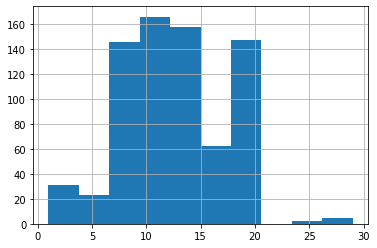

In [414]:
preprocessed_data["Service time"].hist()